In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns

# Import the data, fix the file extension
df = pd.read_csv('train.csv')  # Correct the file extension to .csv
pd.set_option('display.max_columns', None)


print(df)
df.head()

df.isna().sum()



             ID  Loan Amount  Funded Amount  Funded Amount Investor  Term  \
0      65087372        10000          32236             12329.36286    59   
1       1450153         3609          11940             12191.99692    59   
2       1969101        28276           9311             21603.22455    59   
3       6651430        11170           6954             17877.15585    59   
4      14354669        16890          13226             13539.92667    59   
...         ...          ...            ...                     ...   ...   
67458  16164945        13601           6848             13175.28583    59   
67459  35182714         8323          11046             15637.46301    59   
67460  16435904        15897          32921             12329.45775    59   
67461   5300325        16567           4975             21353.68465    59   
67462  65443173        15353          29875             14207.44860    59   

      Batch Enrolled  Interest Rate Grade Sub Grade Employment Duration  \


ID                              0
Loan Amount                     0
Funded Amount                   0
Funded Amount Investor          0
Term                            0
Batch Enrolled                  0
Interest Rate                   0
Grade                           0
Sub Grade                       0
Employment Duration             0
Home Ownership                  0
Verification Status             0
Payment Plan                    0
Loan Title                      0
Debit to Income                 0
Delinquency - two years         0
Inquires - six months           0
Open Account                    0
Public Record                   0
Revolving Balance               0
Revolving Utilities             0
Total Accounts                  0
Initial List Status             0
Total Received Interest         0
Total Received Late Fee         0
Recoveries                      0
Collection Recovery Fee         0
Collection 12 months Medical    0
Application Type                0
Last week Pay 

In [50]:
#verificar se há valores em falta
missing_values = df.isnull().sum()

print()
print("Missing Values:")
print(missing_values)

#Id is not relevant
df = df.drop(['ID'] , axis=1)
df = df.drop(['Batch Enrolled'] , axis=1)
df = df.drop(['Sub Grade'] , axis=1)

# Define a mapping dictionary
status_mapping = {1: 'Defaulter', 0: 'Non-Defaulter'}

# Map the "Loan Status" column using the defined mapping
df['Loan Status'] = df['Loan Status'].map(status_mapping)

df.head()


Missing Values:
ID                              0
Loan Amount                     0
Funded Amount                   0
Funded Amount Investor          0
Term                            0
Batch Enrolled                  0
Interest Rate                   0
Grade                           0
Sub Grade                       0
Employment Duration             0
Home Ownership                  0
Verification Status             0
Payment Plan                    0
Loan Title                      0
Debit to Income                 0
Delinquency - two years         0
Inquires - six months           0
Open Account                    0
Public Record                   0
Revolving Balance               0
Revolving Utilities             0
Total Accounts                  0
Initial List Status             0
Total Received Interest         0
Total Received Late Fee         0
Recoveries                      0
Collection Recovery Fee         0
Collection 12 months Medical    0
Application Type               

,Loan Amount,Funded Amount,Funded Amount Investor,Term,Interest Rate,Grade,Employment Duration,Home Ownership,Verification Status,Payment Plan,Loan Title,Debit to Income,Delinquency - two years,Inquires - six months,Open Account,Public Record,Revolving Balance,Revolving Utilities,Total Accounts,Initial List Status,Total Received Interest,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,10000,32236,12329.36286,59,11.135007,B,MORTGAGE,176346.62670,Not Verified,n,Debt Consolidation,16.284758,1,0,13,0,24246,74.932551,7,w,2929.646315,0.102055,2.498291,0.793724,0,INDIVIDUAL,49,0,31,311301,6619,Non-Defaulter
1,3609,11940,12191.99692,59,12.237563,C,RENT,39833.92100,Source Verified,n,Debt consolidation,15.412409,0,0,12,0,812,78.297186,13,f,772.769385,0.036181,2.377215,0.974821,0,INDIVIDUAL,109,0,53,182610,20885,Non-Defaulter
2,28276,9311,21603.22455,59,12.545884,F,MORTGAGE,91506.69105,Source Verified,n,Debt Consolidation,28.137619,0,0,14,0,1843,2.073040,20,w,863.324396,18.778660,4.316277,1.020075,0,INDIVIDUAL,66,0,34,89801,26155,Non-Defaulter
3,11170,6954,17877.15585,59,16.731201,C,MORTGAGE,108286.57590,Source Verified,n,Debt consolidation,18.043730,1,0,7,0,13819,67.467951,12,w,288.173196,0.044131,0.107020,0.749971,0,INDIVIDUAL,39,0,40,9189,60214,Non-Defaulter
4,16890,13226,13539.92667,59,15.008300,C,MORTGAGE,44234.82545,Source Verified,n,Credit card refinancing,17.209886,1,3,13,1,1544,85.250761,22,w,129.239553,19.306646,1294.818751,0.368953,0,INDIVIDUAL,18,0,430,126029,22579,Non-Defaulter


0        Non-Defaulter
1        Non-Defaulter
2        Non-Defaulter
3        Non-Defaulter
4        Non-Defaulter
             ...      
67458        Defaulter
67459    Non-Defaulter
67460    Non-Defaulter
67461    Non-Defaulter
67462    Non-Defaulter
Name: Loan Status, Length: 67463, dtype: object
24


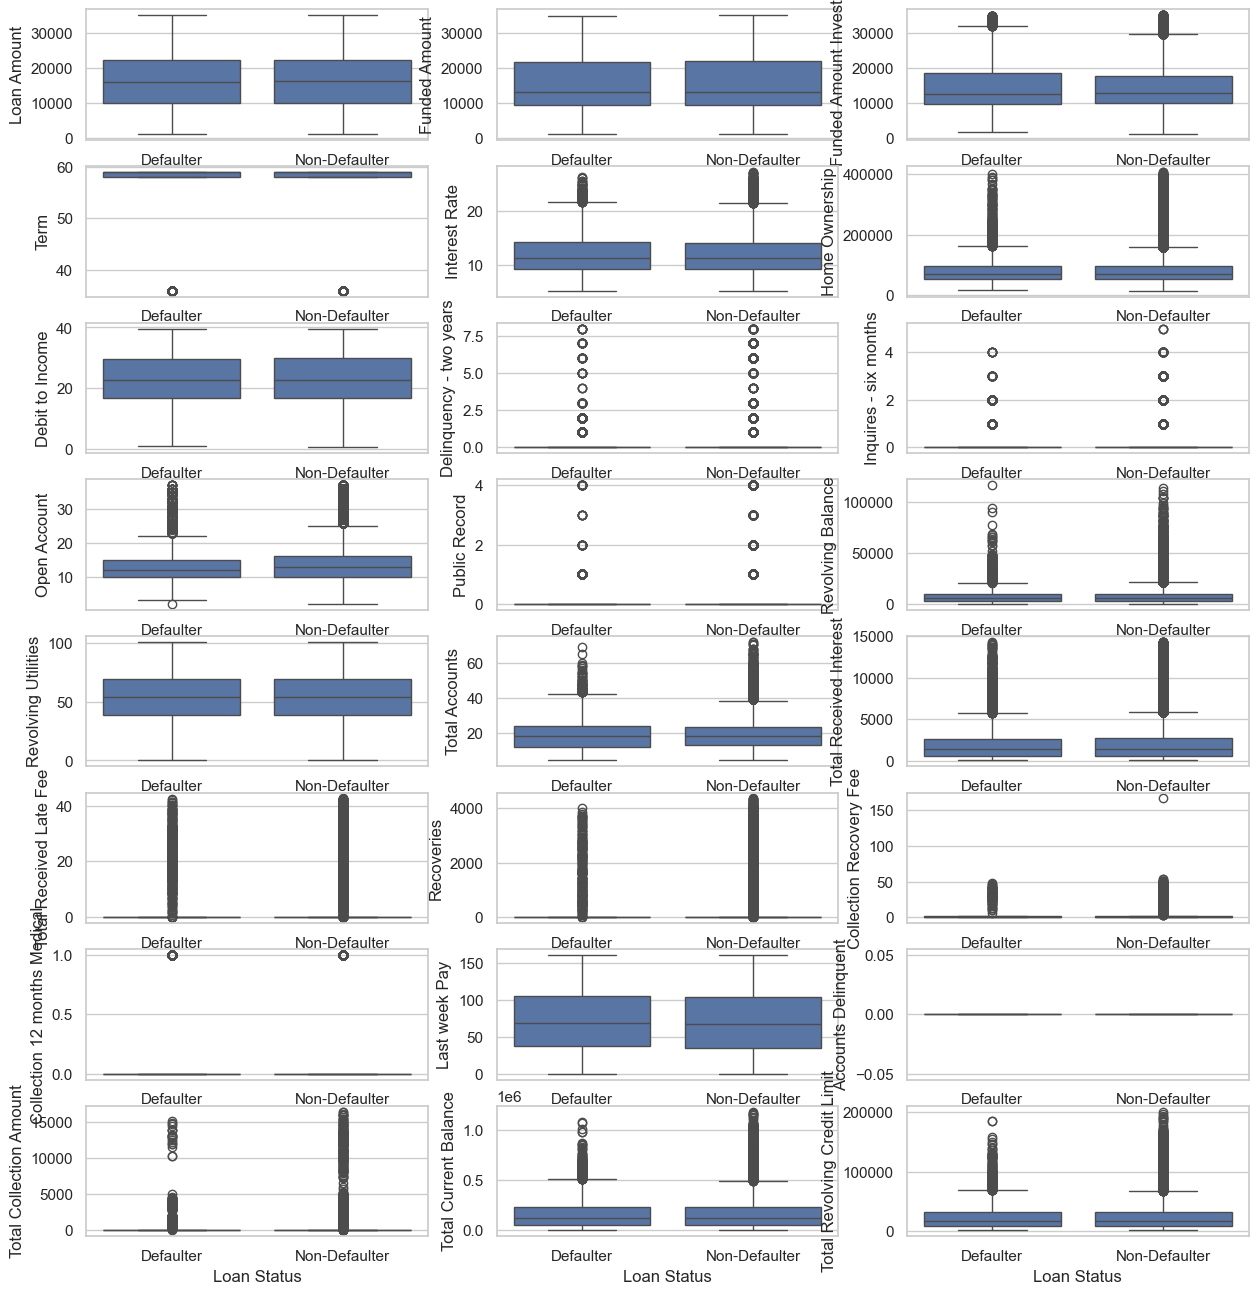

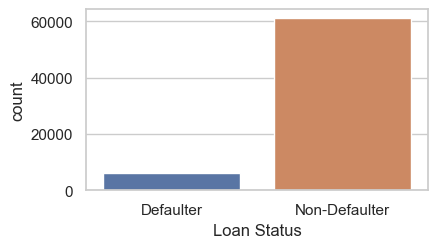

In [51]:
#Explorar graficamente o atributo 'Diagnosis'
print(df['Loan Status'])

df['Loan Status'] = df['Loan Status'].astype('category')
sns.set(style="whitegrid")

# Boxplot para os atributos numéricos:
numerical_attributes = df.select_dtypes(include=['float64', 'int64']).columns
print(len(numerical_attributes))

plt.figure(figsize=(15,20))
for i, column in enumerate(numerical_attributes, 1):
    plt.subplot(10, 3, i)
    sns.boxplot(x='Loan Status', y=column, data=df)

# Histograma para os atributos categóricos:
categorical_attributes = df.select_dtypes(include='category').columns
plt.figure(figsize=(15, 8))
for i, column in enumerate(categorical_attributes, 1):
   plt.subplot(3, 3, i)
   sns.countplot(x=column, hue='Loan Status', data=df)

plt.show()

LinAlgError: Singular matrix

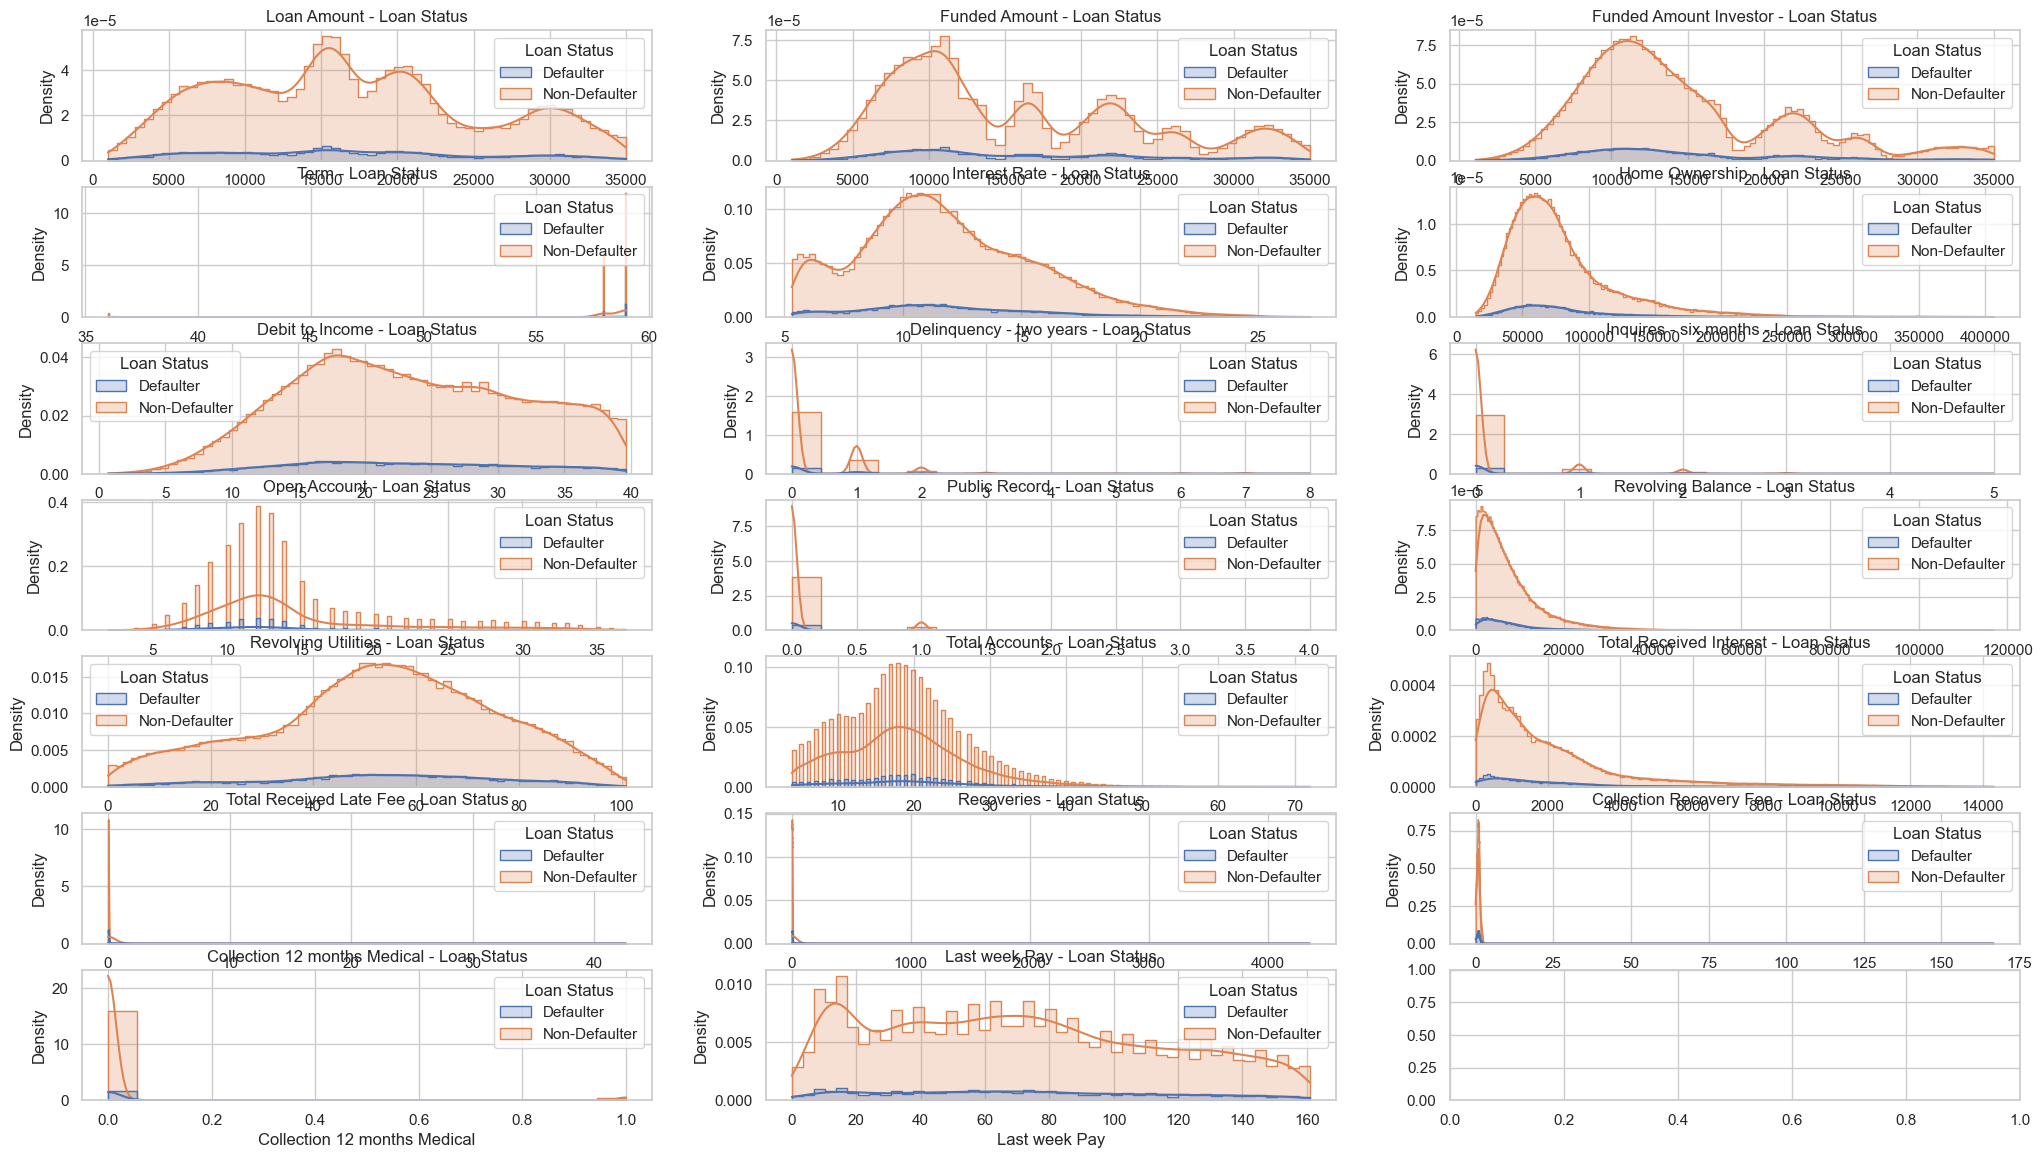

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot for the numerical attributes
numerical_attributes = df.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(25, 20))
for i, column in enumerate(numerical_attributes, 1):
    ax = plt.subplot(10, 3, i)
    sns.histplot(data=df, x=column, hue='Loan Status', kde=True, element="step", stat="density")
    ax.set_title(f"{column} - Loan Status")

# Histogram for the categorical attributes
categorical_attributes = df.select_dtypes(include='category').columns

plt.figure(figsize=(15, 8))
for i, column in enumerate(categorical_attributes, 1):
    ax = plt.subplot(3, 3, i)
    sns.countplot(x=column, hue='Loan Status', data=df)
    ax.set_title(f"{column} - Loan Status")

plt.show()